In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [2]:
np.random.seed(0)

# Load the store sales dataset
excel_file = pd.ExcelFile('data/store_sales.xlsx')
sheet_names = excel_file.sheet_names

# Read the data
df = pd.read_excel(excel_file, sheet_name=sheet_names[2]) # 2, 8, 9
iri_key_counts = df["IRI_KEY"].value_counts()
iri_keys = iri_key_counts[iri_key_counts > 300].index


features = ["F", "D", "Unit.Price"]
target = "Total.Volume"

df = df[df["IRI_KEY"] == iri_keys[0]]
X = df[features].values
y = df[target].values

sheet_names, iri_keys, X.shape, y.shape

(['StoreWeekSalescarbbev_modify',
  'StoreWeekSalescigets',
  'StoreWeekSalescoffee',
  'StoreWeekSalescoldcer',
  'StoreWeekSalesdeod',
  'StoreWeekSalesdiapers',
  'StoreWeekSalesfactiss',
  'StoreWeekSalesfzdinent',
  'StoreWeekSalesfzpizza',
  'StoreWeekSaleshotdog',
  'StoreWeekSaleslaundet',
  'StoreWeekSalesmargbutr',
  'StoreWeekSalesmayo',
  'StoreWeekSalesmustketc',
  'StoreWeekSalespaptowl',
  'StoreWeekSalespeanbutr',
  'StoreWeekSalesshamp',
  'StoreWeekSalessoup',
  'StoreWeekSalesspagsauc',
  'StoreWeekSalessugarsub',
  'StoreWeekSalestoitisu',
  'StoreWeekSalestoothpa',
  'StoreWeekSalesyogurt',
  'StoreWeekSalesbeer_modify'],
 Index([6001821.0,  648368.0,  279300.0,  400003.0,  270862.0,  231720.0,
         252570.0,  659827.0,  241565.0,  237277.0,  291276.0,  273920.0,
         232633.0,  233246.0,  532639.0,  533864.0],
       dtype='float64', name='IRI_KEY'),
 (313, 3),
 (313,))

In [3]:
# # Load the Boston dataset
# data_url = "http://lib.stat.cmu.edu/datasets/boston"
# raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22,  # type: ignore
#                      header=None)  # type: ignore
# X = np.hstack([raw_df.values[::2, :-1], raw_df.values[1::2, :2]])
# y = raw_df.values[1::2, 2].reshape(-1, 1).ravel()

In [4]:
# scaler_X = StandardScaler()
# X = scaler_X.fit_transform(X)
# scaler_y = StandardScaler()
# y = scaler_y.fit_transform(y.reshape(-1, 1)).ravel()  # type: ignore

In [5]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import GridSearchCV


def best_estimator(model, param_grid, X, y):
    search = GridSearchCV(model, param_grid, cv=5, n_jobs=1, verbose=1)
    search.fit(X, y)
    return search.best_estimator_

In [6]:
import pandas as pd
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import KFold
import time


def evaluate_model(model, X, y, cv=5, aggregate=True):
    # scaler_X = StandardScaler()
    # X = scaler_X.fit_transform(X)
    # scaler_y = StandardScaler()
    # y = scaler_y.fit_transform(y.reshape(-1, 1)).ravel()  # type: ignore

    kf = KFold(n_splits=cv, shuffle=True, random_state=42)
    data = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        start_time = time.time()
        model.fit(X_train, y_train)
        end_time = time.time()
        train_time = end_time - start_time

        start_time = time.time()
        # predictions = scaler_y.inverse_transform(model.predict(X_test).reshape(-1, 1)).ravel()  # type: ignore
        predictions = model.predict(X_test)
        end_time = time.time()
        comp_time = end_time - start_time

        # y_test = scaler_y.inverse_transform(y_test.reshape(-1, 1)).ravel()  # type: ignore
        r2 = r2_score(y_test, predictions)
        mae = mean_absolute_error(y_test, predictions)
        mse = mean_squared_error(y_test, predictions)
        n_iter = model.n_iter_ if hasattr(model, 'n_iter_') else 0

        data.append([r2, mae, mse, train_time, comp_time, n_iter])

    df = pd.DataFrame(
        data, columns=['r2', 'mae', 'mse', 'train_time', 'comp_time', 'n_iter'])

    return df.mean() if aggregate else df

In [7]:
from models_sklearn import Ensemble, MLP, FONN1, FONN2, TREENN1, TREENN2
from models import MLP as MLP2, FONN1 as FONN1_2, FONN2 as FONN2_2, TREENN1 as TREENN1_2, TREENN2 as TREENN2_2

ensemble_param_grid = {
}

mlp_param_grid = {
    'max_iter': [2000],
    'learning_rate': ['constant'],
    'learning_rate_init': [1e-1, 1e-2, 1e-3],
    # 'tol': [1e-4],
    'early_stopping': [True]
}

models = {}
# models['Tree'] = best_estimator(Ensemble(1), ensemble_param_grid, X, y)
# models['Ensemble 5'] = best_estimator(Ensemble(5), ensemble_param_grid, X, y)
# models['MLP 5'] = best_estimator(MLP(5), mlp_param_grid, X, y)
# models['FONN1 5 5'] = best_estimator(FONN1(5, (10,)), mlp_param_grid, X, y)
# models['FONN2 5 5'] = best_estimator(FONN2(5, (10,)), mlp_param_grid, X, y)
# models['TREENN1 5'] = best_estimator(TREENN1((6,)), mlp_param_grid, X, y)
# models['TREENN2 5'] = best_estimator(TREENN2((6,)), mlp_param_grid, X, y)
models['Ensemble 10'] = best_estimator(Ensemble(10), ensemble_param_grid, X, y)
models['MLP 10'] = best_estimator(MLP(10), mlp_param_grid, X, y)
models['FONN1 5 10'] = best_estimator(FONN1(5, (10,)), mlp_param_grid, X, y)
models['FONN2 5 10'] = best_estimator(FONN2(5, (10,)), mlp_param_grid, X, y)
models['TREENN1 10'] = best_estimator(TREENN1((11,)), mlp_param_grid, X, y)
models['TREENN2 10'] = best_estimator(TREENN2((11,)), mlp_param_grid, X, y)
# models['Ensemble 40'] = best_estimator(Ensemble(40), ensemble_param_grid, X, y)
# models['MLP 40'] = best_estimator(MLP(40), mlp_param_grid, X, y)
# models['FONN1 5 40'] = best_estimator(FONN1(5, (45,)), mlp_param_grid, X, y)
# models['FONN2 5 40'] = best_estimator(FONN2(5, (45,)), mlp_param_grid, X, y)
# models['TREENN1 40'] = best_estimator(TREENN1((41,)), mlp_param_grid, X, y)
# models['TREENN2 40'] = best_estimator(TREENN2((41,)), mlp_param_grid, X, y)
# models['Ensemble 100'] = best_estimator(Ensemble(100), ensemble_param_grid, X, y)
# models['MLP 100'] = best_estimator(MLP(100), mlp_param_grid, X, y)
# models['FONN1 5 100'] = best_estimator(FONN1(5, (105,)), mlp_param_grid, X, y)
# models['FONN2 5 100'] = best_estimator(FONN2(5, (105,)), mlp_param_grid, X, y)
# models['TREENN1 100'] = best_estimator(TREENN1((101,)), mlp_param_grid, X, y)
# models['TREENN2 100'] = best_estimator(TREENN2((101,)), mlp_param_grid, X, y)

# input_dim = X.shape[1]
# hidden_dim = 10
# output_dim = 1
# learning_rate = 1e-2
# epochs = 1000

# models["MLP2 10"] = MLP2(input_dim, hidden_dim, output_dim,
#                          learning_rate=learning_rate, epochs=epochs)
# num_trees_input = 5
# models["FONN1_2 5 10"] = FONN1_2(input_dim, hidden_dim, output_dim, num_trees_input,
#                                  learning_rate=learning_rate, epochs=epochs)

# num_trees_hidden = 5
# models["FONN2_2 5 10"] = FONN2_2(input_dim, hidden_dim, output_dim, num_trees_hidden,
#                                  learning_rate=learning_rate, epochs=epochs)
# # models["Tree-based Predictions (FONN2)"] = models["FONN2"].trees

# models["TREENN1_2 10"] = TREENN1_2(input_dim, hidden_dim, output_dim,
#                                 learning_rate=learning_rate, epochs=epochs)
# # models["Tree-based Predictions (TREENN1)"] = models["TREENN1"].trees

# models["TREENN2_2 10"] = TREENN2_2(input_dim, hidden_dim, output_dim,
#                                 learning_rate=learning_rate, epochs=epochs)
# # models["Tree-based Predictions (TREENN2)"] = models["TREENN2"].trees

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits


/home/chess/anaconda3/envs/research/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/chess/anaconda3/envs/research/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/chess/anaconda3/envs/research/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/chess/anaconda3/envs/research/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged ye

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits


/home/chess/anaconda3/envs/research/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/chess/anaconda3/envs/research/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/chess/anaconda3/envs/research/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/chess/anaconda3/envs/research/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged ye

In [8]:
# Train and evaluate models
results = []
for name, model in models.items():
    result = evaluate_model(model, X, y).values
    results.append([name, *result])

results_df = pd.DataFrame(
    results, columns=['model', 'r2', 'mae', 'mse', 'train_time', 'comp_time', 'n_iter'])
results_df.set_index('model', inplace=True)
results_df

/home/chess/anaconda3/envs/research/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/chess/anaconda3/envs/research/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/chess/anaconda3/envs/research/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


,r2,mae,mse,train_time,comp_time,n_iter
model,,,,,,
Ensemble 10,0.687755,183.550265,70691.752752,0.008363,0.000448,0.0
MLP 10,0.719836,178.635648,63774.957673,0.167838,0.000223,896.4
FONN1 5 10,0.651418,197.442960,77347.823000,0.018688,0.000449,72.8
FONN2 5 10,0.687694,189.963949,71386.547851,0.455148,0.000074,552.0
TREENN1 10,0.568864,223.382205,97056.252347,0.009568,0.000242,41.0
TREENN2 10,0.671077,196.450206,75407.654073,0.293369,0.000076,793.4


In [9]:
print('\n'.join(map(str,models.values())))

Ensemble(n_estimators=10)
MLP(hidden_layer_sizes=10, learning_rate_init=0.1, max_iter=1000, tol=0)
FONN1(hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=1000,
      num_trees=5, tol=0)
FONN2(hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=1000,
      num_trees=5, tol=0)
TREENN1(hidden_layer_sizes=(11,), learning_rate_init=0.01, max_iter=1000, tol=0)
TREENN2(hidden_layer_sizes=(11,), learning_rate_init=0.1, max_iter=1000, tol=0)


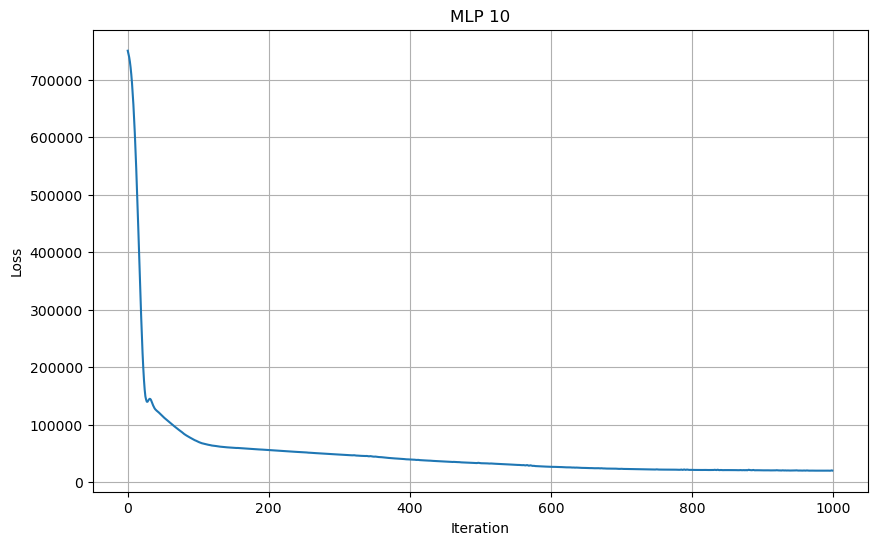

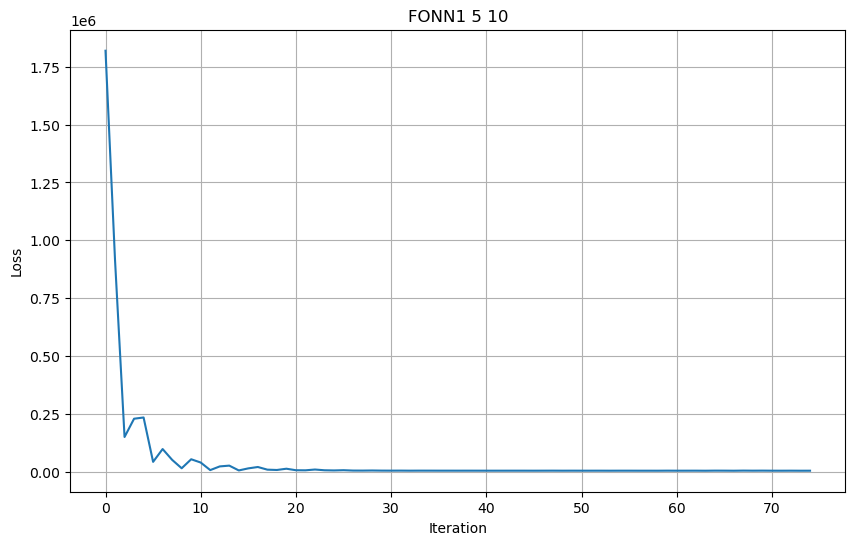

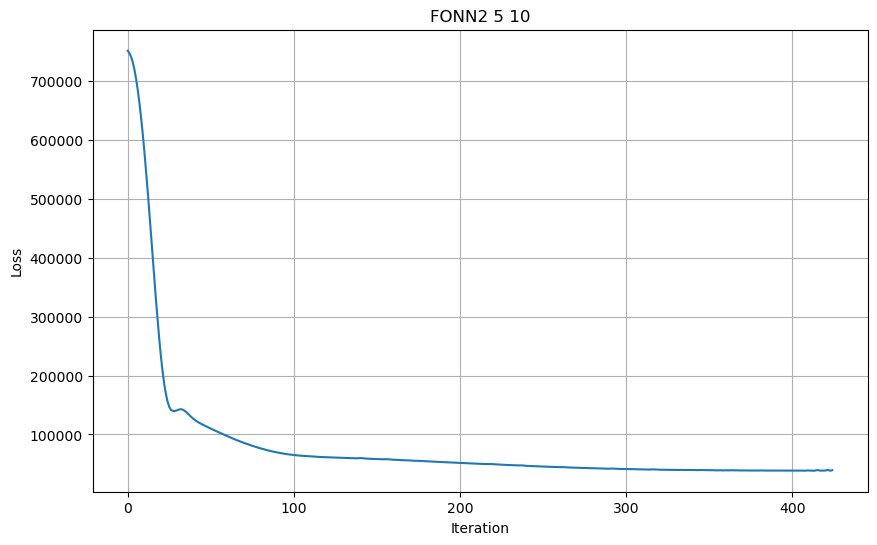

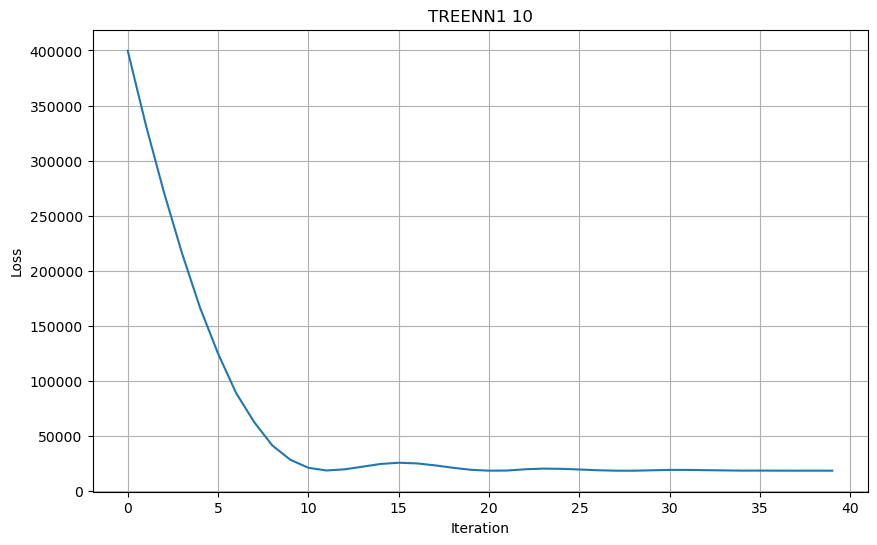

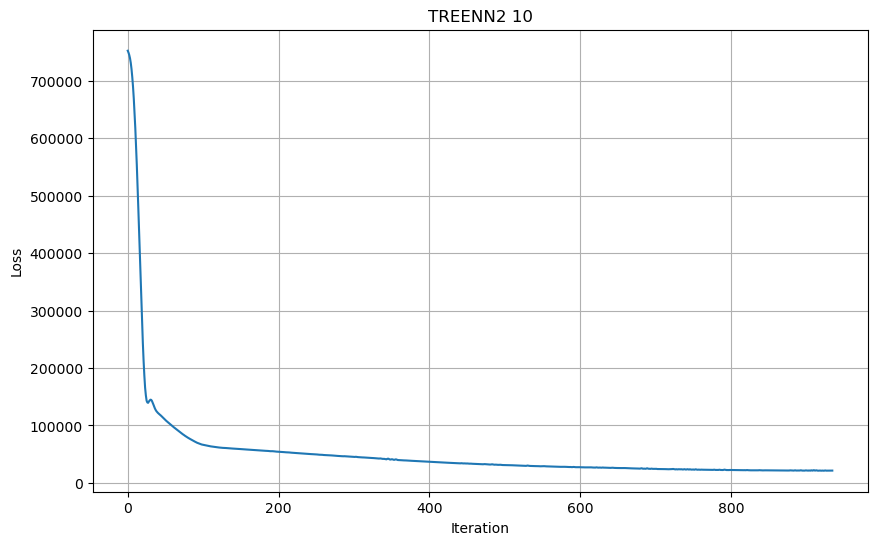

In [10]:
import matplotlib.pyplot as plt


def plot_loss(model, title='Loss Curve'):
    plt.figure(figsize=(10, 6))
    plt.plot(model.loss_curve_)
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.title(title)
    plt.grid()
    plt.show()

for model_name, model in models.items():
    if hasattr(model, 'loss_curve_'):
        plot_loss(model, model_name)